# TP2 Prétraitement et représentation de données 

Membres de l'équipe : 
- Titouan CHOALER chot4078
- Ethan BROUILLET broe5997

## Introduction

## 1. Auscultation des données

### 1.1 Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

df_package = pd.read_csv('package2.csv', sep=';', encoding='cp1252') 
df_product = pd.read_csv('product2.csv', sep=';', encoding='cp1252')

### 1.2 Aperçu initial des données
On examine la structure de base de chaque table, c'est à dire le nombre de lignes et de colonnes et les types des différentes données.

In [2]:
print("Informations sur df_package:")
df_package.info()
print()
print("Informations sur df_product:")
df_product.info()

Informations sur df_package:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173887 entries, 0 to 173886
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PRODUCTID           173887 non-null  object 
 1   PRODUCTNDC          172387 non-null  object 
 2   NDCPACKAGECODE      171541 non-null  object 
 3   PACKAGEDESCRIPTION  173887 non-null  object 
 4   STARTMARKETINGDATE  173887 non-null  int64  
 5   ENDMARKETINGDATE    6456 non-null    float64
 6   NDC_EXCLUDE_FLAG    173887 non-null  object 
 7   SAMPLE_PACKAGE      173887 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.6+ MB

Informations sur df_product:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93238 entries, 0 to 93237
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PRODUCTID                   

In [3]:
print("Premières lignes de df_package:")
display(df_package.head())

Premières lignes de df_package:


,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE,ENDMARKETINGDATE,NDC_EXCLUDE_FLAG,SAMPLE_PACKAGE
0,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,0002-0800,0002-0800-01,1 VIAL in 1 CARTON (0002-0800-01) > 10 mL in ...,19870710,NaN,N,N
1,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",20120601,NaN,N,N
2,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",20120601,NaN,N,N
3,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,20141107,NaN,N,Y
4,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,20141107,NaN,N,N


In [4]:
print("Premières lignes de df_product:")
display(df_product.head())

Premières lignes de df_product:


,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG,LISTING_RECORD_CERTIFIED_THROUGH
0,NaN,0002-0800,HUMAN OTC DRUG,Sterile Diluent,NaN,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,19870710,NaN,NDA,NDA018781,10,WATER,1,mL/mL,NaN,NaN,N,20201231.0
1,NaN,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601,NaN,NDA,NDA202008,10,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,N,20211231.0
2,NaN,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20140918,NaN,BLA,BLA125469,10,DULAGLUTIDE,.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,20201231.0
3,NaN,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20140918,NaN,BLA,BLA125469,10,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,20201231.0
4,NaN,0002-1436,HUMAN PRESCRIPTION DRUG,EMGALITY,NaN,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20180927,NaN,BLA,BLA761063,10,GALCANEZUMAB,120,mg/mL,NaN,NaN,N,20201231.0


`df_package` contient **173 887 entrées** et **8 colonnes**. Les types de données sont un mélange d'objets (chaînes de caractères), d'entiers et de flottants.  
`df_product` contient **93 238 entrées** et **20 colonnes**. La majorité des attributs sont de type objet (aussi des chaînes de caractères), avec quelques colonnes numériques.  
Les colonnes de dates (`STARTMARKETINGDATE`, `ENDMARKETINGDATE`) sont stockées sous forme numérique (entiers ou flottants), il faudra qu'on fasse une conversion pour 
faire un analyse temporelle.

In [39]:
print("Valeurs manquantes dans df_package:")
display(df_package.isna().sum())

Valeurs manquantes dans df_package:


PRODUCTID                  0
PRODUCTNDC              1500
NDCPACKAGECODE          2500
PACKAGEDESCRIPTION         0
STARTMARKETINGDATE         0
ENDMARKETINGDATE      167431
NDC_EXCLUDE_FLAG           0
SAMPLE_PACKAGE             0
dtype: int64

In [40]:
print("Valeurs manquantes dans df_product:")
display(df_product.isna().sum())

Valeurs manquantes dans df_product:


PRODUCTID                            1560
PRODUCTNDC                              0
PRODUCTTYPENAME                         0
PROPRIETARYNAME                         6
PROPRIETARYNAMESUFFIX               83075
NONPROPRIETARYNAME                      4
DOSAGEFORMNAME                          0
ROUTENAME                            1932
STARTMARKETINGDATE                      0
ENDMARKETINGDATE                    88915
MARKETINGCATEGORYNAME                   0
APPLICATIONNUMBER                   13097
LABELERNAME                             0
SUBSTANCENAME                        2309
ACTIVE_NUMERATOR_STRENGTH            2309
ACTIVE_INGRED_UNIT                   2309
PHARM_CLASSES                       50984
DEASCHEDULE                         88815
NDC_EXCLUDE_FLAG                        0
LISTING_RECORD_CERTIFIED_THROUGH     4325
dtype: int64

Pour `df_package`:
- `ENDMARKETINGDATE` a **167 431** valeurs manquantes (sur 173 887), soit environ 96% de données manquantes. La grande majorité des produits sont toujours commercialisés.
- `PRODUCTNDC` et `NDCPACKAGECODE` ont également quelques milliers de valeurs manquantes.

Pour `df_product`:
- Plusieurs colonnes ont un taux de remplissage très faible : `PROPRIETARYNAMESUFFIX` (83 075 manquants), `ENDMARKETINGDATE` (88 915 manquants), et `DEASCHEDULE` (88 815 manquants). Sans modifications, ces colonnes vont être difficilement exploitables.
- `PHARM_CLASSES` aussi a pas mal de valeurs manquantes (50 984), ce qui peut poser problème pour les analyses futures qui dépendraient de cette classification.

### 1.4 Incohérences intra-attribut
Dans un premier temps on regardera dans chaque csv les incohérences de format puis on cherchera les dates illogiques.

In [45]:
def verifier_incoherences_package(file_path):    
    # on part du fichier csv pour être sur d etout trouver
    try:
        df = pd.read_csv(file_path, sep=';', encoding='cp1252', dtype=str) # On charge tout en str pour vérifier le format
    except Exception as e:
        print(f"Erreur de chargement : {e}")
        return

    incoherences_trouvees = False

    regex_ndc = r'^\d+-\d+$' # format de PRODUCTNDC
    mask_ndc_invalid = ~df['PRODUCTNDC'].str.match(regex_ndc, na=False)
    
    if mask_ndc_invalid.sum() > 0:
        incoherences_trouvees = True
        print(f"\n{mask_ndc_invalid.sum()} erreurs de format dans PRODUCTNDC (Attendu: '1234-5678')")
        print("Exemples :")
        print(df.loc[mask_ndc_invalid, 'PRODUCTNDC'].unique()[:5])
    else:
        print("\nPRODUCTNDC : Format respecté.")

    regex_package = r'^\d+-\d+-\d+$' # format de NDCPACKAGECODE
    mask_pkg_invalid = ~df['NDCPACKAGECODE'].str.match(regex_package, na=False)
    
    if mask_pkg_invalid.sum() > 0:
        incoherences_trouvees = True
        print(f"\n{mask_pkg_invalid.sum()} erreurs de format dans NDCPACKAGECODE (Attendu: '1234-5678-90')")
        print("Exemples :")
        print(df.loc[mask_pkg_invalid, 'NDCPACKAGECODE'].unique()[:5])
    else:
        print("\nNDCPACKAGECODE : Format respecté.")

    mask_check_rel = df['PRODUCTID'].notna() & df['PRODUCTNDC'].notna() # on vérifie que les deux sont présents
    
    incoherent_ids = [(idx, row['PRODUCTID'], row['PRODUCTNDC']) for idx, row in df[mask_check_rel].iterrows() if row['PRODUCTNDC'] not in row['PRODUCTID']]
    
    if incoherent_ids:
        incoherences_trouvees = True
        print(f"\n{len(incoherent_ids)} incohérences relationnelles (PRODUCTID ne contient pas PRODUCTNDC)")
        print("Exemples (Index, ID, NDC) :")
        for item in incoherent_ids[:5]:
            print(f" - Ligne {item[0]} : ID='{item[1]}' vs NDC='{item[2]}'")
    else:
        print("\nRelation PRODUCTID / PRODUCTNDC respectée.")

    def is_typo_date(val):
        if val is None or pd.isna(val):
            return False
        try:
            date = datetime.strptime(str(val), '%Y%m%d')
            if date.year > 2050:
                return True
            if date.month > 12 or date.month < 1:
                return True
            if date.day > 31 or date.day < 1:
                return True
        except ValueError:
            return True

    mask_start_typo = df['STARTMARKETINGDATE'].apply(is_typo_date)
    mask_end_typo = df['ENDMARKETINGDATE'].apply(is_typo_date)

    if mask_start_typo.sum() > 0 or mask_end_typo.sum() > 0:
        incoherences_trouvees = True
        print(f"\nErreurs de valeurs de date (Attendu: Année < 2050, 12 > Mois > 1, 31 > Jour > 1) :")
        if mask_start_typo.sum() > 0: print(f" - StartMarketingDate : {mask_start_typo.sum()} erreurs.")
        if mask_end_typo.sum() > 0: print(f" - EndMarketingDate : {mask_end_typo.sum()} erreurs.")
        print(df.loc[mask_start_typo | mask_end_typo, ['STARTMARKETINGDATE', 'ENDMARKETINGDATE']].head(5))
    else:
        print("\nDates : Valeurs valides.")

    valeurs_valides_flag = ['E', 'U', 'I', 'N'] # valeurs valides de NDC_EXCLUDE_FLAG
    mask_flag_invalid = ~df['NDC_EXCLUDE_FLAG'].isin(valeurs_valides_flag) & df['NDC_EXCLUDE_FLAG'].notna()
    
    if mask_flag_invalid.sum() > 0:
        incoherences_trouvees = True
        print(f"\n{mask_flag_invalid.sum()} valeurs invalides dans NDC_EXCLUDE_FLAG")
        print(f"Valeurs trouvées : {df.loc[mask_flag_invalid, 'NDC_EXCLUDE_FLAG'].unique()}")
    else:
        print("\nNDC_EXCLUDE_FLAG : Valeurs valides.")

    valeurs_valides_sample = ['Y', 'N'] # valeurs valides de SAMPLE_PACKAGE
    mask_sample_invalid = ~df['SAMPLE_PACKAGE'].isin(valeurs_valides_sample) & df['SAMPLE_PACKAGE'].notna()
    
    if mask_sample_invalid.sum() > 0:
        incoherences_trouvees = True
        print(f"\n{mask_sample_invalid.sum()} valeurs invalides dans SAMPLE_PACKAGE")
        print(f"Valeurs trouvées : {df.loc[mask_sample_invalid, 'SAMPLE_PACKAGE'].unique()}")
    else:
        print("\nSAMPLE_PACKAGE : Valeurs valides.")

    if not incoherences_trouvees:
        print("\n Aucune incohérence détectée par rapport aux règles définies pour ces données.")

verifier_incoherences_package('package2.csv')


2019 erreurs de format dans PRODUCTNDC (Attendu: '1234-5678')
Exemples :
['05-juin' '19-juin' '03-sept' '05-sept' '11-sept']

2500 erreurs de format dans NDCPACKAGECODE (Attendu: '1234-5678-90')
Exemples :
[nan '20211201' '20200620' '20200909' '20201031']

519 incohérences relationnelles (PRODUCTID ne contient pas PRODUCTNDC)
Exemples (Index, ID, NDC) :
 - Ligne 228 : ID='0006-0005_0c7a3452-ecb2-4f66-ad52-94f8eaf8cde8' vs NDC='05-juin'
 - Ligne 229 : ID='0006-0005_0c7a3452-ecb2-4f66-ad52-94f8eaf8cde8' vs NDC='05-juin'
 - Ligne 230 : ID='0006-0019_54e9c31a-9429-4842-b2d6-0cc1e5ad613c' vs NDC='19-juin'
 - Ligne 492 : ID='0009-0003_67759a7c-ea06-4151-87e1-a301c44d67cd' vs NDC='03-sept'
 - Ligne 493 : ID='0009-0005_c9aa26c1-05c3-479c-90eb-63b2181c5e7e' vs NDC='05-sept'

Erreurs de valeurs de date (Attendu: Année < 2050, 12 > Mois > 1, 31 > Jour > 1) :
 - StartMarketingDate : 243 erreurs.
    STARTMARKETINGDATE ENDMARKETINGDATE
31            29970623              NaN
110           29970106

In [55]:
def verifier_incoherences_product(file_path):
    # mêmes commentaires que pour la fonction sur package
    try:
        df = pd.read_csv(file_path, sep=';', encoding='cp1252', dtype=str)
    except Exception as e:
        print(f"Erreur critique lors du chargement : {e}")
        return

    incoherences = False

    regex_ndc = r'^\d+-\d+$'
    mask_ndc_format = ~df['PRODUCTNDC'].str.match(regex_ndc, na=False)
    mask_ndc_asterisk = df['PRODUCTNDC'].str.contains(r'\*', na=False)
    
    if mask_ndc_format.sum() > 0 or mask_ndc_asterisk.sum() > 0:
        incoherences = True
        if mask_ndc_format.sum() > 0:
            print(f"{mask_ndc_format.sum()} ne respectent pas le format 'X-Y'.")
        if mask_ndc_asterisk.sum() > 0:
            print(f"{mask_ndc_asterisk.sum()} contiennent des astérisques interdits.")
        print("Exemples :", df.loc[mask_ndc_format | mask_ndc_asterisk, 'PRODUCTNDC'].unique()[:5])
    else:
        print("\nPRODUCTNDC : Format et règles respectés.")

    mask_check_rel = df['PRODUCTID'].notna() & df['PRODUCTNDC'].notna()
    ids_invalides = [
        (row['PRODUCTNDC'], row['PRODUCTID']) 
        for _, row in df[mask_check_rel].iterrows() 
        if row['PRODUCTNDC'] not in row['PRODUCTID']
    ]
    
    if ids_invalides:
        incoherences = True
        print(f"\n{len(ids_invalides)} incohérences : PRODUCTID ne contient pas PRODUCTNDC.")
        print("Exemple :", ids_invalides[0])
    else:
        print("\nRelation PRODUCTID / PRODUCTNDC respectée.")

    def is_valid_date(val):
        if pd.isna(val) or val == '': return True
        try:
            datetime.strptime(str(val), '%Y%m%d')
            return True
        except ValueError:
            return False

    mask_start_bad = ~df['STARTMARKETINGDATE'].apply(is_valid_date)
    mask_end_bad = ~df['ENDMARKETINGDATE'].apply(is_valid_date)
    
    if mask_start_bad.sum() > 0 or mask_end_bad.sum() > 0:
        incoherences = True
        print(f"\nErreurs de format de date (Attendu: YYYYMMDD) :")
        if mask_start_bad.sum() > 0: print(f" - StartMarketingDate : {mask_start_bad.sum()} erreurs.")
        if mask_end_bad.sum() > 0: print(f" - EndMarketingDate : {mask_end_bad.sum()} erreurs.")
    else:
        print("\nDates : Formats valides.")

    def is_typo_date(val):
        if val is None or pd.isna(val):
            return False
        try:
            date = datetime.strptime(str(val), '%Y%m%d')
            if date.year > 2050:
                return True
            if date.month > 12 or date.month < 1:
                return True
            if date.day > 31 or date.day < 1:
                return True
        except ValueError:
            return True

    mask_start_typo = df['STARTMARKETINGDATE'].apply(is_typo_date)
    mask_end_typo = df['ENDMARKETINGDATE'].apply(is_typo_date)

    if mask_start_typo.sum() > 0 or mask_end_typo.sum() > 0:
        incoherences = True
        print(f"\nErreurs de valeurs de date (Attendu: Année < 2050, 12 > Mois > 1, 31 > Jour > 1) :")
        if mask_start_typo.sum() > 0: print(f" - StartMarketingDate : {mask_start_typo.sum()} erreurs.")
        if mask_end_typo.sum() > 0: print(f" - EndMarketingDate : {mask_end_typo.sum()} erreurs.")
    else:
        print("\nDates : Valeurs valides.")
    
    valid_dea = ['CI', 'CII', 'CIII', 'CIV', 'CV']
    mask_dea_notna = df['DEASCHEDULE'].notna()
    mask_dea_bad = ~df.loc[mask_dea_notna, 'DEASCHEDULE'].isin(valid_dea)
    
    if mask_dea_bad.sum() > 0:
        incoherences = True
        nb_err = mask_dea_bad.sum()
        vals = df.loc[mask_dea_notna][mask_dea_bad]['DEASCHEDULE'].unique()
        print(f"\n{nb_err} valeurs interdites dans DEASCHEDULE.")
        print(f"Valeurs trouvées (hors CI-CV) : {vals}")
    else:
        print("\nDEASCHEDULE : Valeurs valides.")

    valid_flags = ['E', 'U', 'I', 'D', 'N'] 
    mask_flag_bad = ~df['NDC_EXCLUDE_FLAG'].fillna('N').isin(valid_flags)
    
    if mask_flag_bad.sum() > 0:
        incoherences = True
        print(f"\n{mask_flag_bad.sum()} flags inconnus dans NDC_EXCLUDE_FLAG.")
        print("Valeurs trouvées :", df.loc[mask_flag_bad, 'NDC_EXCLUDE_FLAG'].unique())
    else:
        print("\nNDC_EXCLUDE_FLAG : Valeurs valides.")

    col_subst = 'SUBSTANCENAME'
    col_str_num = 'ACTIVE_NUMERATOR_STRENGTH' # Correspond à StrengthNumber
    col_str_unit = 'ACTIVE_INGRED_UNIT'      # Correspond à StrengthUnit
    
    if all(c in df.columns for c in [col_subst, col_str_num, col_str_unit]):
        count_mismatch = 0
        for idx, row in df.iterrows():
            n_subst = str(row[col_subst]).count(';') + 1 if pd.notna(row[col_subst]) else 0
            n_num = str(row[col_str_num]).count(';') + 1 if pd.notna(row[col_str_num]) else 0
            n_unit = str(row[col_str_unit]).count(';') + 1 if pd.notna(row[col_str_unit]) else 0
            
            if not (n_subst == n_num == n_unit) and n_subst > 0:
                count_mismatch += 1
        
        if count_mismatch > 0:
            incoherences = True
            print(f"\n{count_mismatch} produits ont des listes d'ingrédients/dosages de longueurs différentes (Incohérence MV).")
        else:
            print("\nCohérence des listes (Substances vs Dosages) respectée.")
    else:
        print("\nImpossible de vérifier la cohérence des substances (Noms de colonnes différents du standard).")

    if not incoherences:
        print("\nAucune incohérence majeure détectée sur les règles testées.")

verifier_incoherences_product('product2.csv')

513 ne respectent pas le format 'X-Y'.
Exemples : ['05-juin' '19-juin' '03-sept' '05-sept' '11-sept']

513 incohérences : PRODUCTID ne contient pas PRODUCTNDC.
Exemple : ('05-juin', '0006-0005_0c7a3452-ecb2-4f66-ad52-94f8eaf8cde8')

Dates : Formats valides.

Erreurs de valeurs de date (Attendu: Année < 2050, 12 > Mois > 1, 31 > Jour > 1) :
 - EndMarketingDate : 1 erreurs.

DEASCHEDULE : Valeurs valides.

NDC_EXCLUDE_FLAG : Valeurs valides.

1 produits ont des listes d'ingrédients/dosages de longueurs différentes (Incohérence MV).


Dans package2.csv on remarque differents problèmes :
- 2019 erreurs de format dans PRODUCTNDC (Attendu: '1234-5678')
- 2500 erreurs de format dans NDCPACKAGECODE (Attendu: '1234-5678-90')
- 519 incohérences relationnelles (PRODUCTID ne contient pas PRODUCTNDC)

Dans product2.cdv on remarque aussi des problèmes mais qui découlent l'un de l'autre : 
- 513 ne respectent pas le format 'X-Y'.
- 513 incohérences : PRODUCTID ne contient pas PRODUCTNDC. (qui découle du premier problème)
- 1 produit a des listes d'ingrédients/dosages de longueurs différentes (Incohérence MV).

Ce sont tous les problèmes que l'on va devoir corrigé pour la question 3 et dnas la question 2 il nous faudra retrouver les relations imposées par le tables et aussi peut être de nouvelles règles qui découlent de ces règles imposées.

On cherche plus en détails si dans les dates il y a un problème sur une date de fin de commercialisation (`ENDMARKETINGDATE`)qui serait avant une date de début de commercialiation (`STARTMARKETINGDATE`).

In [7]:
def convert_date_manual(val):
    try:
        if pd.isna(val) or str(val).lower() == 'nan':
            return None
        val_str = str(val).split('.')[0] 
        return datetime.strptime(val_str, '%Y%m%d')
    except (ValueError, TypeError):
        return None

In [8]:
df_package_dates = df_package[['STARTMARKETINGDATE', 'ENDMARKETINGDATE']].copy()
df_package_dates['STARTMARKETINGDATE'] = df_package_dates['STARTMARKETINGDATE'].apply(convert_date_manual)
df_package_dates['ENDMARKETINGDATE'] = df_package_dates['ENDMARKETINGDATE'].apply(convert_date_manual)

incoherent_dates = df_package_dates[df_package_dates['STARTMARKETINGDATE'] > df_package_dates['ENDMARKETINGDATE']]
print(f"Nombre de dates de commercialisation incohérentes (début > fin) dans df_package: {len(incoherent_dates)}")
print()

df_product_dates = df_product[['STARTMARKETINGDATE', 'ENDMARKETINGDATE']].copy()
df_product_dates['STARTMARKETINGDATE'] = df_product_dates['STARTMARKETINGDATE'].apply(convert_date_manual)
df_product_dates['ENDMARKETINGDATE'] = df_product_dates['ENDMARKETINGDATE'].apply(convert_date_manual)

incoherent_product = df_product_dates[df_product_dates['STARTMARKETINGDATE'] > df_product_dates['ENDMARKETINGDATE']]
print(f"Nombre de dates de commercialisation incohérentes (début > fin) dans df_product : {len(incoherent_product)}")

Nombre de dates de commercialisation incohérentes (début > fin) dans df_package: 18

Nombre de dates de commercialisation incohérentes (début > fin) dans df_product : 0


Pour `df_product` il n'y a pas le même nombre d'enregistrements dans `STARTMARKETINGDATE` et `ENDMARKETINGDATE` donc il n'est pas evident de tester les dates. Il faut donc convertir tout en format datetime pour éviter les erreurs de type. 

Ici, on a été obligé de faire une fonction de convertion des dates au format YYYYMMDD en datetime manuellement parceque nos données contiennent des dates dépassant l'année 2262 et donc la fonction native de pandas `to_datetime` n'est pas capable de bien convertir ces dates. 

Il y a **18 enregistrements** dans `df_package` où la `STARTMARKETINGDATE` est postérieure à la `ENDMARKETINGDATE`. Il s'agit surement d'erreurs de données qui devront être corrigées ou supprimées lors du nettoyage.

Pour `df_product` on n'obtient aucun problèmes d'inchorences sur nos données. Il faut prendre en compte que l'on ne considère pas comme incohérences les cas où la date de fin des `NaN` ou `NaT`. 

### 1.5 Incohérences inter-attributs
En plus des incohérences montré dans la partie précedentes et les règles qu'impose la table de données, ici on va chercher les inchérences qu'il peut y avoir entre les deux tables comme les identifiants produits.

In [10]:
ids_package = set(df_package['PRODUCTID'].dropna().unique())
ids_product = set(df_product['PRODUCTID'].dropna().unique())

missing_in_product = ids_package - ids_product
print(f"Nombre de PRODUCTID dans 'package' qui ne sont pas dans 'product': {len(missing_in_product)}")

missing_in_package = ids_product - ids_package
print(f"Nombre de PRODUCTID dans 'product' qui ne sont pas dans 'package': {len(missing_in_package)}")

Nombre de PRODUCTID dans 'package' qui ne sont pas dans 'product': 1561
Nombre de PRODUCTID dans 'product' qui ne sont pas dans 'package': 155


Il existe une incohérence entre les deux tables au niveau des `PRODUCTID`. 
On a trouvé :
- **1 561** `PRODUCTID` dans la table `package` qui n'ont pas de correspondance dans la table `product`.
- **155** `PRODUCTID` dans `product` qui n'ont pas de correspondance dans `package`.

Cela signifie qu'une jointure interne (`inner join`) entraînerait une perte de **1 716 produits** au total. On va donc choisir de faire une jointure externe (`outer join`) pour le merge, ce qui permettra de conserver toutes les informations, tout en gérant les valeurs nulles qui apparaitront.

En regardant les règles imposées par la table, on s'est posé la question de si il y avait un lien entre la categorie marketing et la classification DEA. C'est ce que l'on v aessayer de trouver en comparant les deux attributs. 

In [11]:
relation_table = pd.crosstab(df_product['MARKETINGCATEGORYNAME'], df_product['DEASCHEDULE'])
print("Relation entre Catégorie Marketing et Classification DEA :")
display(relation_table)

Relation entre Catégorie Marketing et Classification DEA :


DEASCHEDULE,CII,CIII,CIV,CV
MARKETINGCATEGORYNAME,,,,
ANDA,1289,350,1496,270
NDA,371,79,116,60
NDA AUTHORIZED GENERIC,124,18,53,26
OTC MONOGRAPH FINAL,0,0,0,37
UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE,1,0,0,0
UNAPPROVED DRUG OTHER,17,14,84,0
UNAPPROVED HOMEOPATHIC,0,18,0,0


Le tableau montre la distribution des classifications DEA (`DEASCHEDULE`) en fonction de la catégorie de commercialisation (`MARKETINGCATEGORYNAME`).  
On observe des relations logiques, par exemple, les médicaments `OTC MONOGRAPH FINAL` (en vente libre) sont majoritairement classés `CV`, la catégorie la moins stricte. À l'inverse, `ANDA` et `NDA` (sur ordonnance) couvrent tout le spectre des classifications. Un cas intéressant est `UNAPPROVED HOMEOPATHIC` qui n'a que des classifications `CIII`, ce qui pourrait être règle definie par la législation. 

### 1.6 Vraisemblance et interprétabilité

In [12]:
valid_dates_package = df_package_dates['STARTMARKETINGDATE'].dropna() # on enleve les NaN
valid_dates_package_end = df_package_dates['ENDMARKETINGDATE'].dropna()

print("Statistiques descriptives pour df_package['STARTMARKETINGDATE']:")
print(f"Min : {min(valid_dates_package)}")
print(f"Max : {max(valid_dates_package)}")
print()

print("Statistiques descriptives pour df_package['ENDMARKETINGDATE']:")
print(f"Min : {min(valid_dates_package_end)}")
print(f"Max : {max(valid_dates_package_end)}")

Statistiques descriptives pour df_package['STARTMARKETINGDATE']:
Min : 1900-01-01 00:00:00
Max : 2997-12-24 00:00:00

Statistiques descriptives pour df_package['ENDMARKETINGDATE']:
Min : 2020-02-15 00:00:00
Max : 2039-08-31 00:00:00


In [13]:
valid_dates_product = df_product_dates['STARTMARKETINGDATE'].dropna()
valid_dates_product_end = df_product_dates['ENDMARKETINGDATE'].dropna()

print("Statistiques descriptives pour df_product['STARTMARKETINGDATE']:")
print(f"Min : {min(valid_dates_product)}")
print(f"Max : {max(valid_dates_product)}")
print()

print("Statistiques descriptives pour df_product['ENDMARKETINGDATE']:")
print(f"Min : {min(valid_dates_product_end)}")
print(f"Max : {max(valid_dates_product_end)}")


Statistiques descriptives pour df_product['STARTMARKETINGDATE']:
Min : 1900-01-01 00:00:00
Max : 2020-02-14 00:00:00

Statistiques descriptives pour df_product['ENDMARKETINGDATE']:
Min : 2020-02-15 00:00:00
Max : 3031-02-09 00:00:00


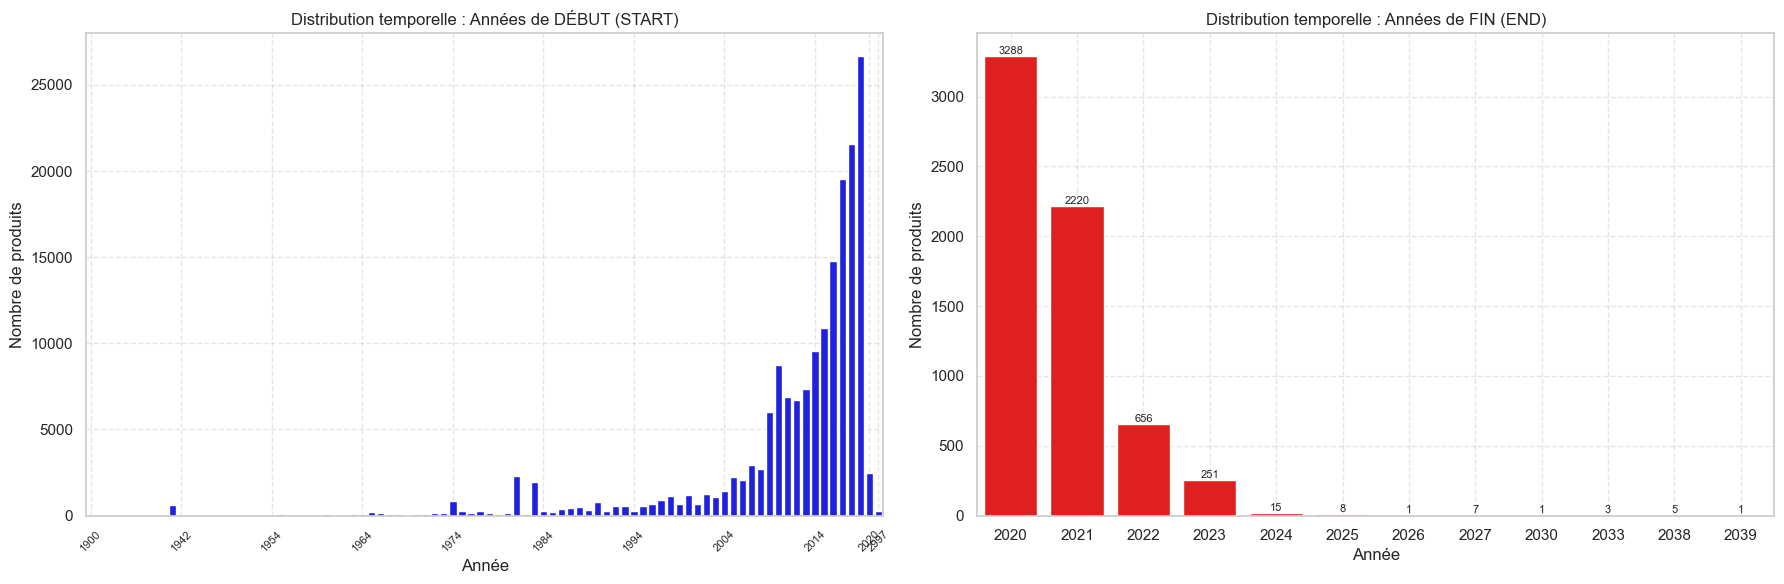

In [14]:
start_years_counts = df_package_dates['STARTMARKETINGDATE'].dropna().apply(lambda x: x.year).value_counts().sort_index()
end_years_counts = df_package_dates['ENDMARKETINGDATE'].dropna().apply(lambda x: x.year).value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=start_years_counts.index, y=start_years_counts.values, ax=axes[0], color='blue')
axes[0].set_title('Distribution temporelle : Années de DÉBUT (START)')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Nombre de produits')
axes[0].grid(True, linestyle='--', alpha=0.5)
n_years = len(start_years_counts)
step = 10
special_indices = [n_years - 2, n_years - 1]
custom_ticks = list(range(0, n_years, step))
for idx in special_indices:
    if idx not in custom_ticks and idx >= 0:
        custom_ticks.append(idx)
custom_ticks.sort()
axes[0].set_xticks(custom_ticks)
axes[0].set_xticklabels(start_years_counts.index[custom_ticks], rotation=45)
axes[0].tick_params(axis='x', labelsize=8)

sns.barplot(x=end_years_counts.index, y=end_years_counts.values, ax=axes[1], color='red')
axes[1].set_title('Distribution temporelle : Années de FIN (END)')
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Nombre de produits')
axes[1].grid(True, linestyle='--', alpha=0.5)
for i, v in enumerate(end_years_counts.values):
    # i = position de la barre (0, 1, 2...)
    # v = hauteur de la barre (le nombre)
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

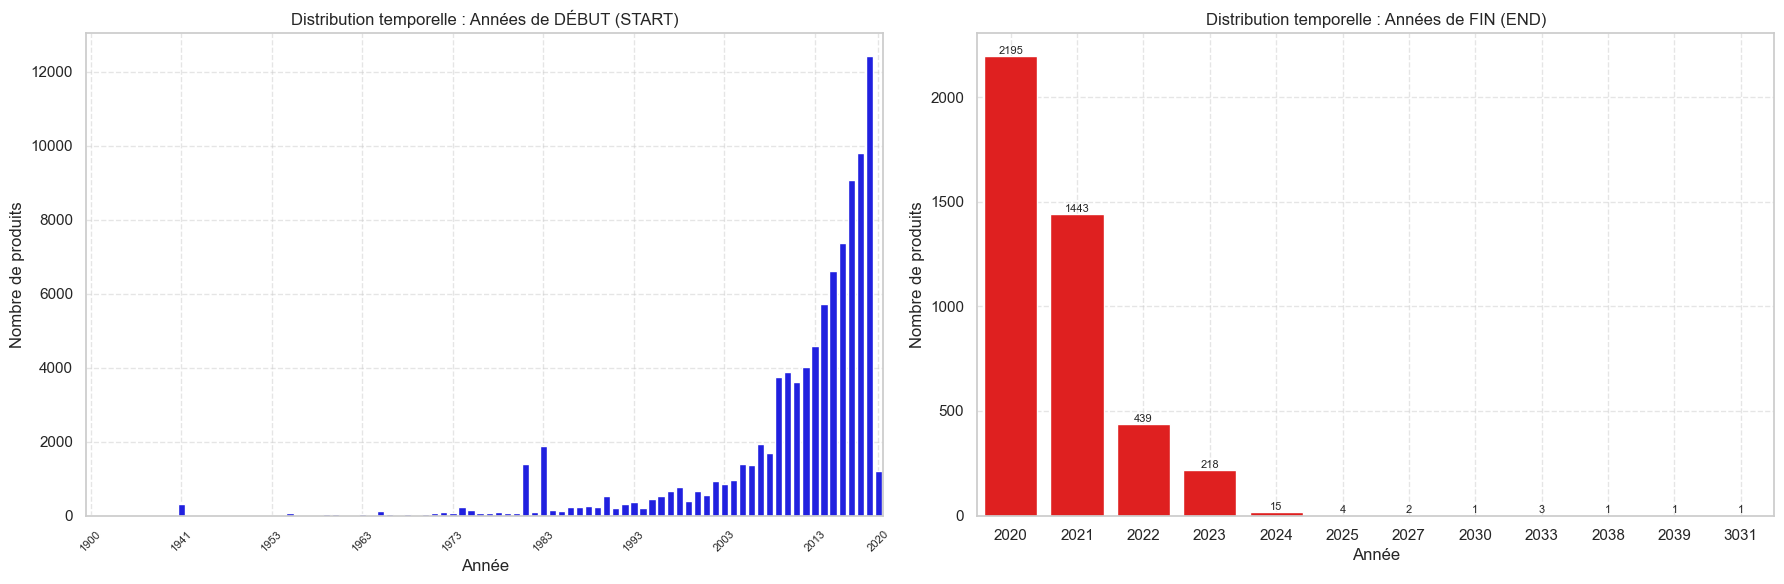

In [15]:
start_years_counts = df_product_dates['STARTMARKETINGDATE'].dropna().apply(lambda x: x.year).value_counts().sort_index()
end_years_counts = df_product_dates['ENDMARKETINGDATE'].dropna().apply(lambda x: x.year).value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=start_years_counts.index, y=start_years_counts.values, ax=axes[0], color='blue')
axes[0].set_title('Distribution temporelle : Années de DÉBUT (START)')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Nombre de produits')
axes[0].grid(True, linestyle='--', alpha=0.5)
n_years = len(start_years_counts)
step = 10
special_indices = n_years - 1
custom_ticks = list(range(0, n_years, step))
if special_indices not in custom_ticks:
    custom_ticks.append(special_indices)
custom_ticks.sort()
axes[0].set_xticks(custom_ticks)
axes[0].set_xticklabels(start_years_counts.index[custom_ticks], rotation=45)
axes[0].tick_params(axis='x', labelsize=8)

sns.barplot(x=end_years_counts.index, y=end_years_counts.values, ax=axes[1], color='red')
axes[1].set_title('Distribution temporelle : Années de FIN (END)')
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Nombre de produits')
axes[1].grid(True, linestyle='--', alpha=0.5)
for i, v in enumerate(end_years_counts.values):
    # i = position de la barre (0, 1, 2...)
    # v = hauteur de la barre (le nombre)
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

L'examen des variables temporelles (STARTMARKETINGDATE et ENDMARKETINGDATE) confirme une cohérence globale de l'historique des données même si il est fort probable que certaines date contiennent des typos de par leur valeurs très lointaine. Par exemple des dates en `2997` ou `3031` pourrait être `2007` et `2031` (les 0 qui seraient devenu des 9 dans `2007` avec une typo et le 2 devenu un 3 dans `2031`) biensûr ce ne sont que des hypothèses mais les barplots montrent que ce sont des valeurs très éloignées par rapport aux autres et même si `2997` apparait plusieurs fois c'est la seule valeur unique à dépasser `2020`. 

Pour la suite, ces données seront modfiées pour que les dates `2997` deviennent `2007`et les `3031` deveinnent `2031`. Avec ces modfiications, il sera alors possible de réutiliser à nouveau la convertion nagtive de pandas (`to_datetime`).

In [16]:
def corriger_annee(d):
    if d is None or pd.isna(d):
        return d
    if d.year == 2997:
        return d.replace(year=2007)
    if d.year == 3031:
        return d.replace(year=2031)
    return d

In [17]:
df_package['STARTMARKETINGDATE'] = df_package['STARTMARKETINGDATE'].apply(convert_date_manual).apply(corriger_annee)
df_package['ENDMARKETINGDATE'] = df_package['ENDMARKETINGDATE'].apply(convert_date_manual).apply(corriger_annee)

df_product['STARTMARKETINGDATE'] = df_product['STARTMARKETINGDATE'].apply(convert_date_manual).apply(corriger_annee)
df_product['ENDMARKETINGDATE'] = df_product['ENDMARKETINGDATE'].apply(convert_date_manual).apply(corriger_annee)
cols = ['STARTMARKETINGDATE', 'ENDMARKETINGDATE']

for col in cols:
    df_package[col] = pd.to_datetime(df_package[col])
    df_product[col] = pd.to_datetime(df_product[col])

display(df_package[cols].describe())
display(df_product[cols].describe())

,STARTMARKETINGDATE,ENDMARKETINGDATE
count,173887,6456
mean,2011-12-16 09:48:43.795338240,2021-04-17 09:28:06.245353472
min,1900-01-01 00:00:00,2020-02-15 00:00:00
25%,2010-05-17 00:00:00,2020-08-01 00:00:00
50%,2015-10-26 00:00:00,2020-12-31 00:00:00
75%,2018-05-01 00:00:00,2021-11-13 00:00:00
max,2020-02-14 00:00:00,2039-08-31 00:00:00


,STARTMARKETINGDATE,ENDMARKETINGDATE
count,93238,4323
mean,2011-02-10 08:56:43.316244736,2021-04-27 21:16:26.814712064
min,1900-01-01 00:00:00,2020-02-15 00:00:00
25%,2009-09-01 00:00:00,2020-08-14 00:00:00
50%,2014-12-19 00:00:00,2020-12-31 00:00:00
75%,2018-01-01 00:00:00,2021-11-08 00:00:00
max,2020-02-14 00:00:00,2039-08-31 00:00:00


On a corrigé les données pour la suite. 

### 1.7 Analyse Visuelle

#### 1.7.1 Distribution des catégories de commercialisation
Nous examinons la répartition des produits en fonction de leur `MARKETINGCATEGORYNAME`.

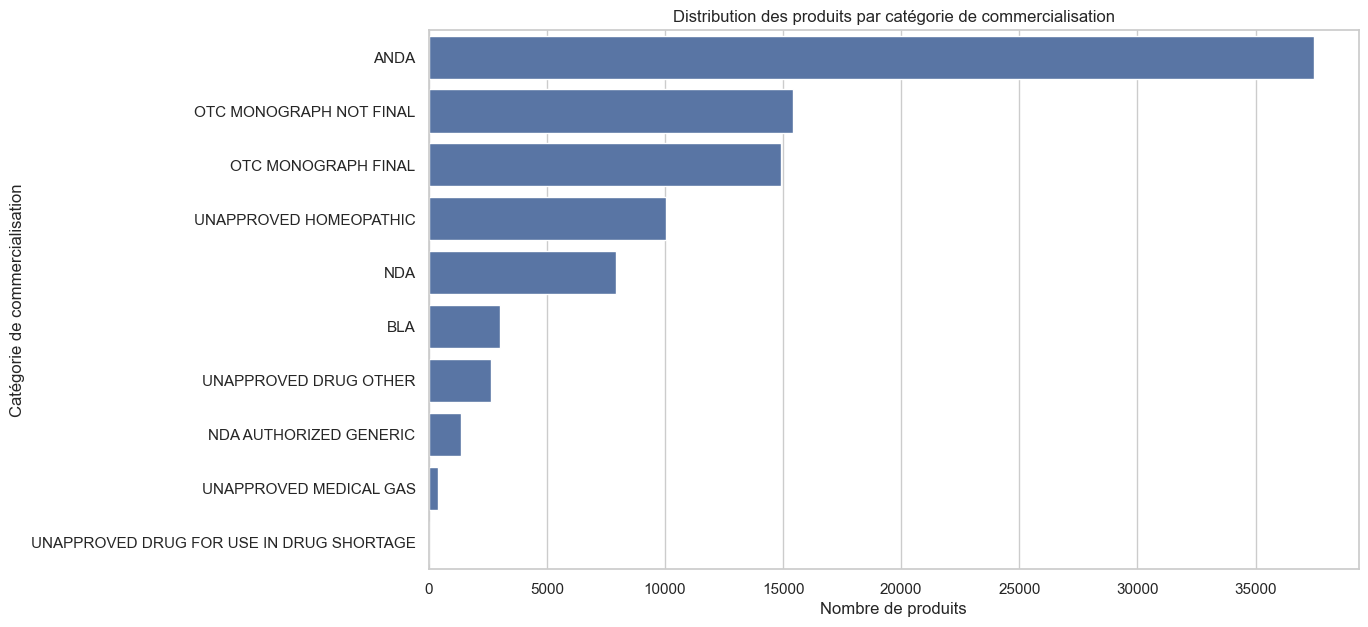

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(y=df_product['MARKETINGCATEGORYNAME'], order=df_product['MARKETINGCATEGORYNAME'].value_counts().index)
plt.title('Distribution des produits par catégorie de commercialisation')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de commercialisation')
plt.show()

Le graphique montre que les catégories `ANDA` (Abbreviated New Drug Application, pour les génériques) et `OTC MONOGRAPH NOT FINAL` (Over-the-counter, monographie non finale) sont les plus représentées. Cela peut indiquer une forte présence de médicaments génériques et de produits en vente libre sur le marché américain.

#### 1.7.2 Top 15 des formes de dosage
Il existe de nombreuses formes de dosage (`DOSAGEFORMNAME`). On va visualiser le 15 plus courantes afin d'identifier les quels sont les plus présents dans nos données.

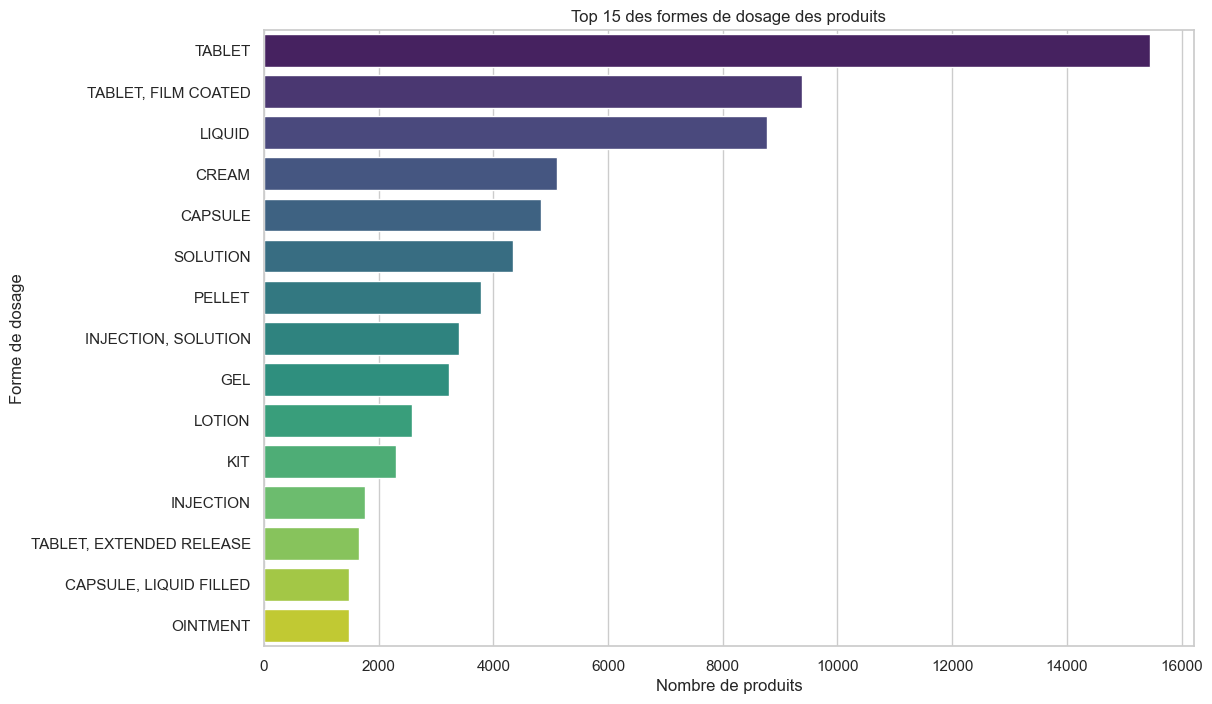

In [19]:
plt.figure(figsize=(12, 8))
top_15_dosage = df_product['DOSAGEFORMNAME'].value_counts().nlargest(15)
sns.barplot(y=top_15_dosage.index, x=top_15_dosage.values, palette='viridis', hue=top_15_dosage.index)
plt.title('Top 15 des formes de dosage des produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Forme de dosage')
plt.show()

Sans surprise, les `TABLET` (comprimés) sont de loin la forme de dosage la plus courante, suivies par les `CAPSULE` et les solutions injectables (`INJECTION`). Cela correspond à la représentation collective des médicaments et c'est aussi les plus courament croisés dans la vie quotidienne.

#### 1.7.3 Analyse des classes pharmaceutiques (`PHARM_CLASSES`)
La colonne `PHARM_CLASSES` contient des informations précieuses sur la classification pharmacologique des produits. Bien que cette colonne contienne de nombreuses valeurs manquantes, on peut essayer d'analyser les données présentes pour identifier les classes les plus fréquentes.

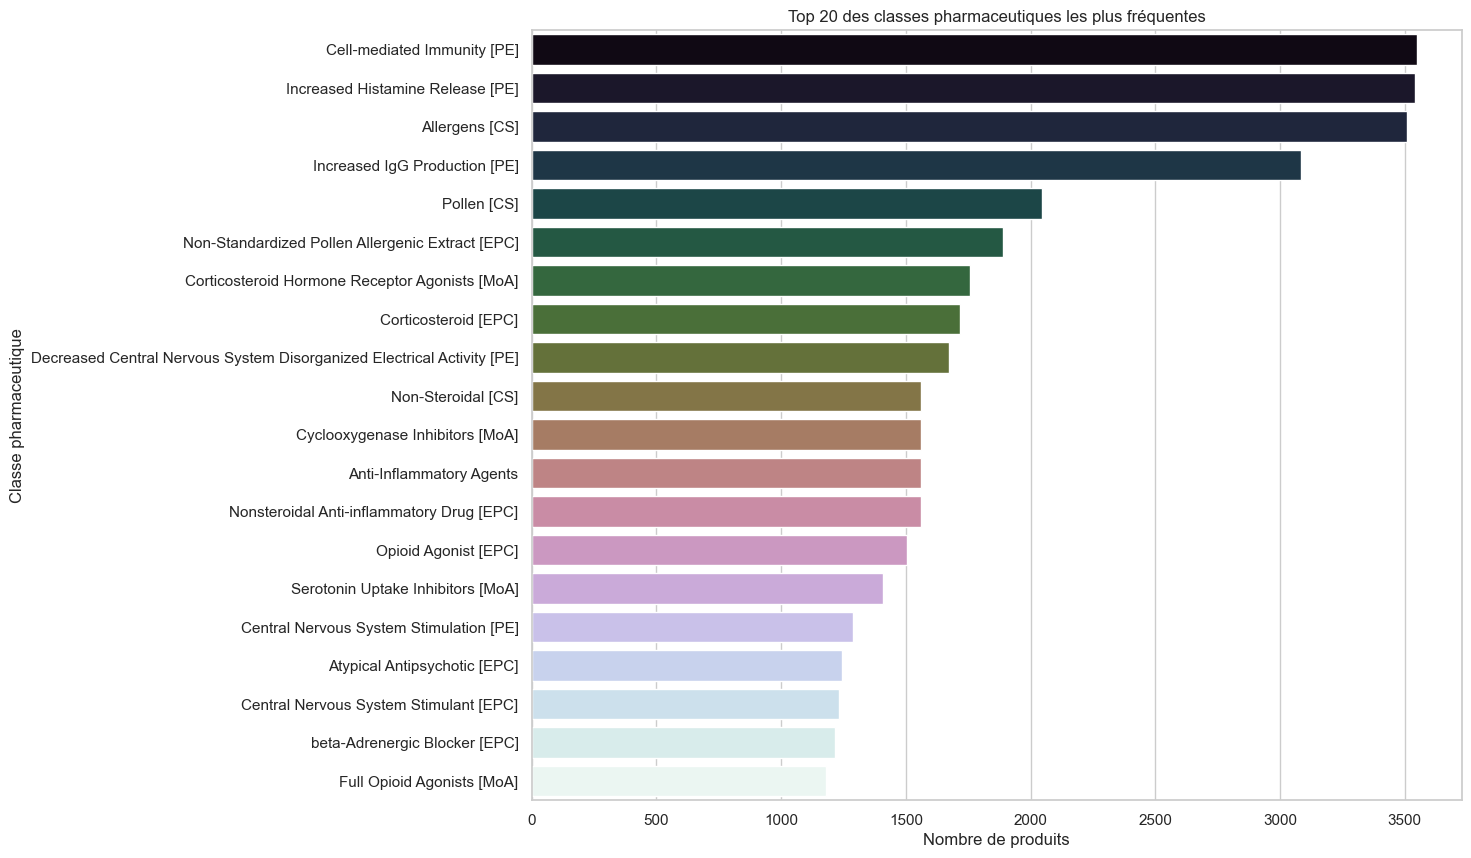

In [20]:
pharm_classes = df_product['PHARM_CLASSES'].dropna().str.split(',').explode()

pharm_classes = pharm_classes.str.strip()

top_20_classes = pharm_classes.value_counts().nlargest(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_20_classes.index, x=top_20_classes.values, palette='cubehelix', hue=top_20_classes.index)
plt.title('Top 20 des classes pharmaceutiques les plus fréquentes')
plt.xlabel('Nombre de produits')
plt.ylabel('Classe pharmaceutique')
plt.show()

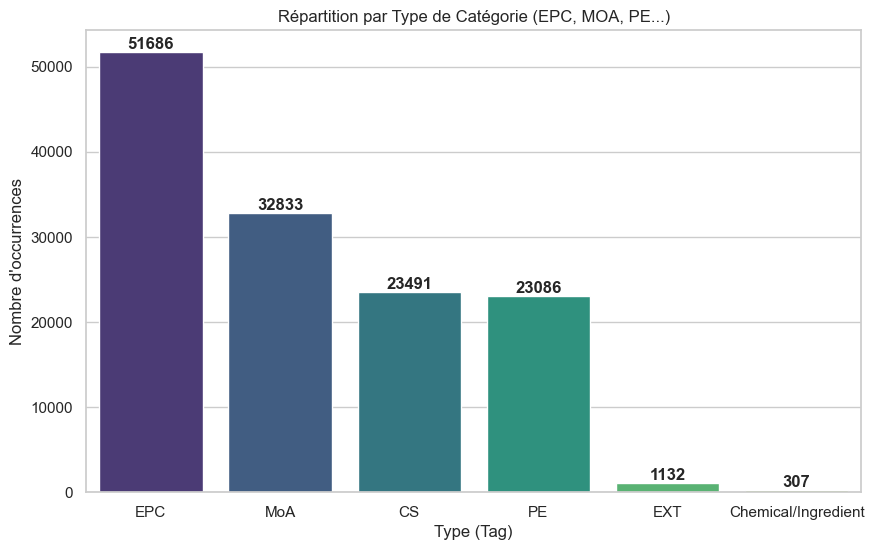

In [21]:
categories_tags = pharm_classes.str.extract(r'\[(.*?)\]')[0]
tags_counts = categories_tags.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=tags_counts.index, y=tags_counts.values, palette='viridis', hue=tags_counts.index)
plt.title('Répartition par Type de Catégorie (EPC, MOA, PE...)')
plt.xlabel('Type (Tag)')
plt.ylabel("Nombre d'occurrences")

for i, v in enumerate(tags_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.show()

Dans ce dernier graphique on peut voir que les types de catégories de tous les médicaments cumulés, les plus courants dans notre jeu de données sont `[EPC]` (Established Pharmacologic Class) et `[MoA]` (Mechanism of Action), qui sont des descripteurs de classification. Même si le podium des médicaments les plus présents sont les `Cell-mediated Immunity`, `Increased Histamine Release` et `Allergens` (graphique précédent).  

Avec cette analyse on confirme la diversité du jeu de données qui pourrait servir de base pour des analyses plus ciblées sur certaines familles de médicaments.

#### 1.7.4 Analyse des substances actives (`SUBSTANCENAME`)
Après les classes pharmaceutiques, il est intéressant de se pencher sur les substances actives les plus courantes dans les médicaments. Cela nous donnera une idée des principes actifs les plus répandus sur le marché.

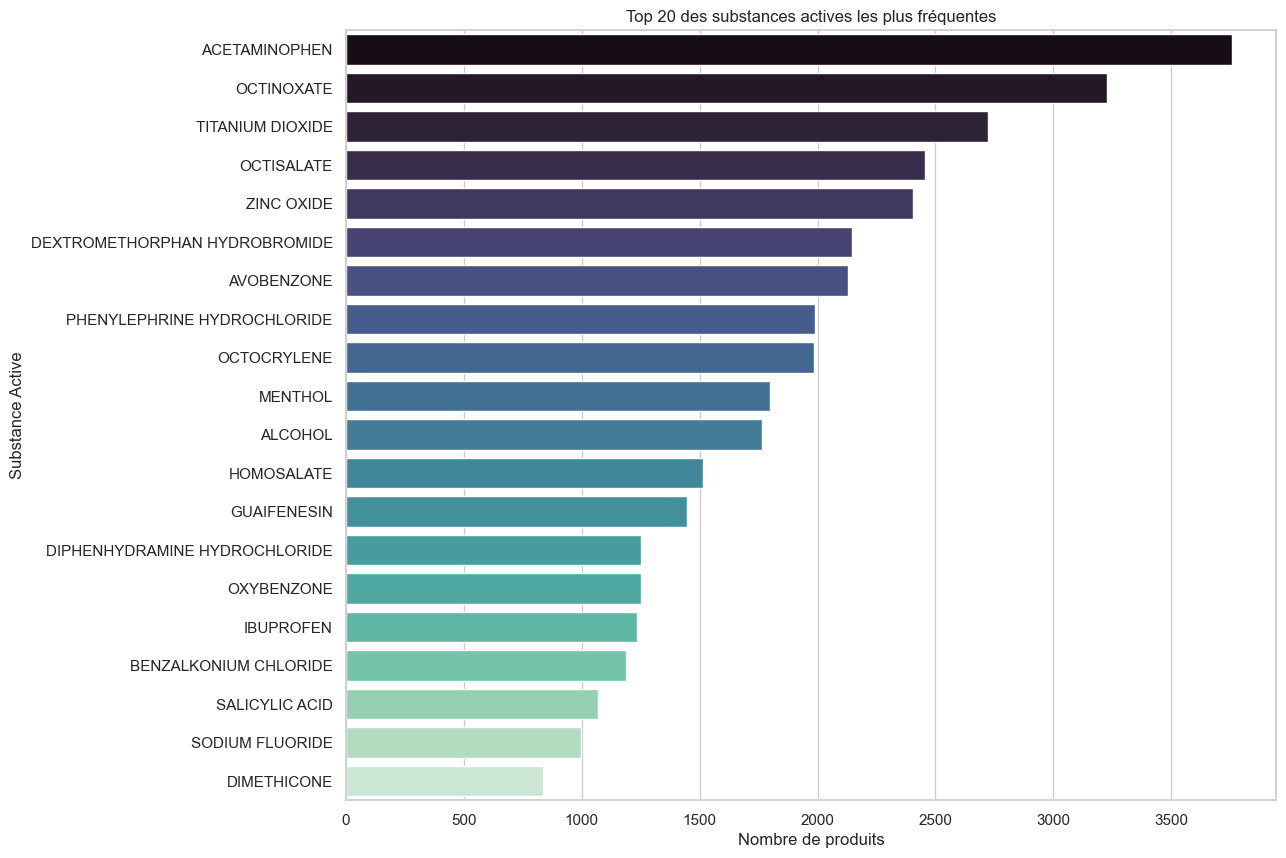

In [22]:
substances = df_product['SUBSTANCENAME'].dropna().str.split('; ').explode()

substances = substances.str.strip()

top_20_substances = substances.value_counts().nlargest(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_20_substances.index, x=top_20_substances.values, palette='mako', hue=top_20_substances.index)
plt.title('Top 20 des substances actives les plus fréquentes')
plt.xlabel('Nombre de produits')
plt.ylabel('Substance Active')
plt.show()

TODO
Le graphique montre que le paracétamole (`acetaminophen`) est la substance active la plus fréquemment listée dans notre jeu de données, ce qui est cohérent puisque c'est le médicament le plus répendu et le plus utilisé. On trouve ensuite des substances très communes comme l'eau (`WATER`), l'oxygène (`OXYGEN`) et le nitrogène (`NITROGEN`).
Parmi les véritables ingrédients actifs médicamenteux, on note la présence de `SALICYLIC ACID` (acide salicylique), un ingrédient courant dans les produits dermatologiques, et le `LIDOCAINE HYDROCHLORIDE`, un anesthésique local. Cette analyse met en évidence la grande variété de produits, allant des gaz médicaux aux médicaments topiques.

### 1.8 Conclusion

Notre première analyse montre que les données, présentent quelques défis de qualité qui nécessiteront un prétraitement rigoureux :
1.  **Données Manquantes :** Des colonnes cruciales comme `PHARM_CLASSES` et `DEASCHEDULE` sont très incomplètes, ce qui peut limiter leur utilisation.
2.  **Incohérences de Données :** Des erreurs logiques (dates de début > dates de fin) et des problèmes de cohérence référentielle entre les tables ont été identifiés.
3.  **Formatage :** Le format des dates doit être converti en type pour permettre des analyses temporelles fiables.
4.  **Erreurs de Saisie :** Des valeurs aberrantes et manifestement incorrectes existent dans les colonnes de dates.

## 2. Relations et règles observées entre les attributs

### 2.1 Dépendances fonctionnelles

In [ ]:
def check_functional_dependency(df, full=False):
    cols = df.columns
    if full:
        delete_cols = ['NDC_EXCLUDE_FLAG']
    else:
        delete_cols = ['NDC_EXCLUDE_FLAG', 'PRODUCTID']
    for colo in delete_cols:
        if colo in cols:
            cols = [col for col in cols if col != colo]
    for col in cols:
        for col2 in cols:
            if col != col2:
                dependency_check = df.groupby(col)[col2].nunique()
                if dependency_check.max() == 1:
                    print(f"Règle trouvée : {col} -> {col2}")
                # else: <-- mis en commentiare pour la rédaction de l'analyse
                    # print(f"Pas de règle stricte. {col} peut avoir plusieurs {col2}.")

print("Règles trouvées pour df_package")
check_functional_dependency(df_package)
print()
print("Règles trouvées pour df_product")
check_functional_dependency(df_product)
print()
print()
print("Utile pour l'explication de pourquoi on retire 'PRODUCTID' de la liste des colonnes à tester")
print("Toutes les règles trouvées pour df_package")
check_functional_dependency(df_package, full=True)
print()
print("Toutes les règles trouvées pour df_product")
check_functional_dependency(df_product, full=True)



Règles trouvées pour df_package
Règle trouvée : NDCPACKAGECODE -> ENDMARKETINGDATE
Règle trouvée : NDCPACKAGECODE -> SAMPLE_PACKAGE
Règle trouvée : PACKAGEDESCRIPTION -> PRODUCTNDC
Règle trouvée : PACKAGEDESCRIPTION -> NDCPACKAGECODE
Règle trouvée : PACKAGEDESCRIPTION -> ENDMARKETINGDATE
Règle trouvée : PACKAGEDESCRIPTION -> SAMPLE_PACKAGE

Règles trouvées pour df_product
Règle trouvée : APPLICATIONNUMBER -> DEASCHEDULE


Utile pour l'explication de pourquoi on retire 'PRODUCTID' de la liste des colonnes à tester
Toutes les règles trouvées pour df_package
Règle trouvée : NDCPACKAGECODE -> ENDMARKETINGDATE
Règle trouvée : NDCPACKAGECODE -> SAMPLE_PACKAGE
Règle trouvée : PACKAGEDESCRIPTION -> PRODUCTNDC
Règle trouvée : PACKAGEDESCRIPTION -> NDCPACKAGECODE
Règle trouvée : PACKAGEDESCRIPTION -> ENDMARKETINGDATE
Règle trouvée : PACKAGEDESCRIPTION -> SAMPLE_PACKAGE

Toutes les règles trouvées pour df_product
Règle trouvée : PRODUCTID -> PRODUCTNDC
Règle trouvée : PRODUCTID -> PRODUCTTYPENAME

In [24]:
print(df_package['NDC_EXCLUDE_FLAG'].unique())
print()
print(df_product['NDC_EXCLUDE_FLAG'].unique())

['N']

['N']


Comme `NDC_EXCLUDE_FLAG` ne possède qu'une seule valeur et que `PRODUCTID` est unique pour chaque valeur, on les retire des attributs testés pour chercher les règles dans nos données.

On a donc identifié plusieurs types de relations au sein des données. 

Ces règles ont été validées sur l'intégralité du jeu de données :
- Table Product : Le `PRODUCTID` agit comme déterminant pour l'ensemble des attributs descriptifs du médicament `(PRODUCTID→{PROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,...})`. Cela confirme qu'il n'y a pas d'incohérence majeure où un même ID pointerait vers deux noms de produits différents.
- Table Package : Le `NDCPACKAGECODE` détermine de manière unique les informations liées au conditionnement, notamment la date de fin de commercialisation (`ENDMARKETINGDATE`) et le flag d'échantillon (`SAMPLE_PACKAGE`). Cependant entre le caractère quasi unique de `ENDMARKETINGDATE` on se retrouve dans le cas des `PRODUCTID` et donc cela ne permet pas de definir la valeur necessaire. 

On a aussi identifié la règle, `APPLICATIONNUMBER→DEASCHEDULE` qui indique que le numéro de dossier d'approbation (FDA) définit systématiquement la classification de la substance (niveau de contrôle de la drogue). Cette règle est précieuse pour l'étape de nettoyage, car si le champ DEASCHEDULE est manquant mais que le `APPLICATIONNUMBER` est connu, la valeur peut être imputée avec une certitude de 100%.

L'analyse a aussi montré la présence de redondances structurelles importantes que l'on traitera lors de la phase de représentation :
- Redondance de description : La règle `PACKAGEDESCRIPTION→NDCPACKAGECODE` indique que la description textuelle est suffisante pour identifier le produit. Mais cette colonne est hautement redondante avec les codes numériques et on devra probablement la simplifier ou la supprimer pour éviter le sur-apprentissage (overfitting).
- Dépendances triviales : De nombreuses règles pointant vers `NDC_EXCLUDE_FLAG` ont été écartées. Ces règles sont des artéfacts statistiques à cause de la valeur unique de l'attribut et ils n'apportent aucune information métier utile.

Là où on peut se poser des questions, c'est lorsque l'on regarde les premières lignes de package2.csv, on remarque l'on devrait avoir une règle sur `NDCPACKAGECODE -> PRODUCTNDC` or ce n'est pas le cas parce que pour certains enregistrements, le format de `NDCPACKAGECODE` change pour devenir un format de date et donc ne contient plus `PRODUCTNDC`. Est-ce une erreur de retranscription, oui parce que celon la définition de cette attribut ("The labeler code, product code, and package code segments of the National Drug Code number, separated by hyphens."), le format date YYYYMMDD n'est pas valide.
On va donc supprimer ces valeurs et retester la présence de règles.


In [25]:
df_package.loc[~df_package['NDCPACKAGECODE'].str.contains('-', na=False), 'NDCPACKAGECODE'] = None

check_functional_dependency(df_package)

Règle trouvée : NDCPACKAGECODE -> PRODUCTNDC
Règle trouvée : NDCPACKAGECODE -> PACKAGEDESCRIPTION
Règle trouvée : NDCPACKAGECODE -> ENDMARKETINGDATE
Règle trouvée : NDCPACKAGECODE -> SAMPLE_PACKAGE
Règle trouvée : PACKAGEDESCRIPTION -> PRODUCTNDC
Règle trouvée : PACKAGEDESCRIPTION -> NDCPACKAGECODE
Règle trouvée : PACKAGEDESCRIPTION -> ENDMARKETINGDATE
Règle trouvée : PACKAGEDESCRIPTION -> SAMPLE_PACKAGE


On obtient 2 nouvelles règles :
- `NDCPACKAGECODE -> PRODUCTNDC`
- `NDCPACKAGECODE -> PACKAGEDESCRIPTION`

Cela est cohérent avec les observations effectuées sur package2.csv et valide donc l'intéret d'avoir "corriger" les typos dans `NDCPACKAGECODE`.  
On ne regardera pas `NDCPACKAGECODE -> PACKAGEDESCRIPTION` pour les raisons cité précedement. 
Pour la règle, `NDCPACKAGECODE -> PRODUCTNDC` c'est celle que l'on voulait trouver et qui a motivé notre correction des typos. On l'avait imaginée de par la structure des données, il y a une relation parents-enfant entre les deux. `NDCPACKAGECODE` est construit à partir de `PRODUCTNDC` plus le format du medicament (nombre de medicament et format ou mode de prise du médicament). 

### 2.2 Inclusions

In [28]:
def check_inclusion(row, col, col2):
    val1 = str(row[col])
    val2 = str(row[col2])
    if val1 == 'nan' or val2 == 'nan' or val1 == "" or val2 == "":
        return False
    return val1 in val2

In [29]:
cols = df_package.columns
for col in cols:
    for col2 in cols:
        if col != col2:
            inclusion_check = df_package.apply(check_inclusion, axis=1, col=col, col2=col2)
            if inclusion_check.mean() > 0.95:
                print(f"Pour df_package : Inclusion {col} dans {col2} : {inclusion_check.mean():.2%} des lignes")

print()
cols = df_product.columns
for col in cols:
    for col2 in cols:
        if col != col2:
            inclusion_check = df_product.apply(check_inclusion, axis=1, col=col, col2=col2)
            if inclusion_check.mean() > 0.95:
                print(f"Pour df_product : Inclusion {col} dans {col2} : {inclusion_check.mean():.2%} des lignes")

print()
for col in df_package.columns:
    counts = df_package[col].value_counts(normalize=True)
    if not counts.empty:
        top_val_share = counts.iloc[0]
        if top_val_share > 0.95:
            print(f"Pour df_product : Colonne {col} : La valeur majoritaire occupe {top_val_share:.2%} des données.")

print()
for col in df_product.columns:
    counts = df_product[col].value_counts(normalize=True)
    if not counts.empty:
        top_val_share = counts.iloc[0]
        if top_val_share > 0.95:
            print(f"Pour df_product : Colonne {col} : La valeur majoritaire occupe {top_val_share:.2%} des données.")



Pour df_package : Inclusion PRODUCTNDC dans PRODUCTID : 98.84% des lignes
Pour df_package : Inclusion PRODUCTNDC dans NDCPACKAGECODE : 97.40% des lignes
Pour df_package : Inclusion PRODUCTNDC dans PACKAGEDESCRIPTION : 98.84% des lignes
Pour df_package : Inclusion NDCPACKAGECODE dans PACKAGEDESCRIPTION : 98.56% des lignes
Pour df_package : Inclusion NDC_EXCLUDE_FLAG dans ENDMARKETINGDATE : 96.29% des lignes
Pour df_package : Inclusion NDC_EXCLUDE_FLAG dans SAMPLE_PACKAGE : 99.62% des lignes
Pour df_package : Inclusion SAMPLE_PACKAGE dans ENDMARKETINGDATE : 95.92% des lignes
Pour df_package : Inclusion SAMPLE_PACKAGE dans NDC_EXCLUDE_FLAG : 99.62% des lignes

Pour df_product : Inclusion PRODUCTNDC dans PRODUCTID : 97.78% des lignes
Pour df_product : Inclusion NDC_EXCLUDE_FLAG dans PRODUCTTYPENAME : 99.68% des lignes
Pour df_product : Inclusion NDC_EXCLUDE_FLAG dans ENDMARKETINGDATE : 95.36% des lignes
Pour df_product : Inclusion NDC_EXCLUDE_FLAG dans MARKETINGCATEGORYNAME : 96.74% des li

L'auscultation des chaînes de caractères a révélé une hiérarchie dans la nomenclature des codes. Les tests d'inclusion démontrent que le `PRODUCTNDC` est une sous-chaîne systématique du `NDCPACKAGECODE` dans 97,40 % des observations, confirmant que le code de l'emballage est une extension directe de l'identifiant produit (relation parent-enfant), les 2.60% manquant sont dues à des valeurs manquantes. Plus surprenant, une redondance textuelle massive apparaît, le `NDCPACKAGECODE` est explicitement inclus dans la `PACKAGEDESCRIPTION` dans 98,56 % des cas, ce qui indique que l'information technique est dupliquée inutilement sous forme littérale et donc que les inclusions concernant `PACKAGEDESCRIPTION` ne seront pas regardés.


Enfin, l'étude de la variance a permis de justifier que l'attribut `NDC_EXCLUDE_FLAG` n'apportant aucune capacité discriminante tandis que `SAMPLE_PACKAGE` l'est à 99,62 %. Bien que ces colonnes génèrent statistiquement des règles d'association, elles ne constituent que des artéfacts sans valeur sémantique et sont des candidates prioritaires à la suppression pour la réduction de dimension.
De même, on ne regarde pas les inclusions avec `PRODUCTID`. 

Pour la question de la règle chronologique, on l'a déjà traité dans la question 1 telle que la date de début de commercialisation `STARTMARKETINGDATE` est toujours inférieure ou égale à la date de fin de commercialisation `ENDMARKETINGDATE` pour les enregistrements. 

## 3. Correction des erreurs 

Comme on l'a dit précédement, on ne regarde ni les règles comprenant `PACKAGEDESCRIPTION` ni celles avec `SAMPLE_PACKAGE`. Cela nous laisse 2 règles à corriger.
Pour df_package :  
- NDCPACKAGECODE -> ENDMARKETINGDATE  
Pour df_product :  
- APPLICATIONNUMBER -> DEASCHEDULE

In [ ]:
def clean_attribute_based_on_rule(df, key_col, target_col):
    mode_map = df.dropna(subset=[target_col]).groupby(key_col)[target_col].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    ref_values = df[key_col].map(mode_map)
    mask_fix = (df[target_col].isna()) | (df[target_col] != ref_values)
    mask_apply = mask_fix & (ref_values.notna())
    df.loc[mask_apply, target_col] = ref_values[mask_apply]

    print(f"Correction {key_col} -> {target_col} : {mask_apply.sum()} valeurs corrigées/imputées.")
    return df

df_package_cleaned = clean_attribute_based_on_rule(df_package, 'NDCPACKAGECODE', 'PRODUCTNDC')
df_package_cleaned = clean_attribute_based_on_rule(df_package, 'NDCPACKAGECODE', 'ENDMARKETINGDATE')

df_product_cleaned = clean_attribute_based_on_rule(df_product, product_cols_start[i], product_cols_end[i])

def verifier_nettoyage(df_avant, df_apres, colonnes_ciblees):
    """
    Compare l'état des données avant et après nettoyage.
    """
    print("=== Bilan du Nettoyage ===")
    
    for col in colonnes_ciblees:
        nan_avant = df_avant[col].isna().sum()
        nan_apres = df_apres[col].isna().sum()
        taux_remplissage = 100 * (1 - nan_apres / len(df_apres))
        
        print(f"\nAttribut : {col}")
        print(f" - Manquants avant : {nan_avant}")
        print(f" - Manquants après : {nan_apres}")
        print(f" - Taux de remplissage actuel : {taux_remplissage:.2f}%")
        
        mask_diff = (df_avant[col].notna()) & (df_apres[col].notna()) & (df_avant[col] != df_apres[col])
        nb_corrections = mask_diff.sum()
        print(f" - Valeurs existantes corrigées (incohérences) : {nb_corrections}")


cols_a_verifier = df_package.columns

# Si vous avez écrasé df_product, vous ne pouvez voir que l'état final :
print("État final des valeurs manquantes :")
print(df_package[cols_a_verifier].isna().sum())

def verifier_regle(df, key_col, target_col):
    # Compte le nombre de valeurs uniques de 'target' pour chaque 'key'
    incoherences = df.groupby(key_col)[target_col].nunique()
    
    # On cherche les clés qui ont plus d'une valeur cible (donc incohérent)
    keys_incoherentes = incoherences[incoherences > 1]
    
    print(f"\nVerification Règle {key_col} -> {target_col}")
    if len(keys_incoherentes) == 0:
        print("Règle parfaitement respectée (1 clé = 1 valeur).")
    else:
        print(f"Attention : {len(keys_incoherentes)} clés ont encore des valeurs multiples (incohérentes).")
        # Afficher un exemple pour comprendre
        exemple_key = keys_incoherentes.index[0]
        print(f"Exemple pour {key_col} = {exemple_key} :")
        print(df[df[key_col] == exemple_key][[key_col, target_col]].drop_duplicates())

# Testez vos règles principales
verifier_regle(df_product, 'PRODUCTNDC', 'PROPRIETARYNAME')
verifier_regle(df_product, 'PRODUCTID', 'DEASCHEDULE')


['NDCPACKAGECODE', 'PACKAGEDESCRIPTION', 'PACKAGEDESCRIPTION', 'PACKAGEDESCRIPTION', 'PRODUCTNDC', 'NDCPACKAGECODE', 'NDC_EXCLUDE_FLAG']
['ENDMARKETINGDATE', 'NDCPACKAGECODE', 'ENDMARKETINGDATE', 'SAMPLE_PACKAGE', 'NDCPACKAGECODE', 'PACKAGEDESCRIPTION', 'SAMPLE_PACKAGE']
['PRODUCTNDC', 'PRODUCTNDC', 'PRODUCTTYPENAME', 'PRODUCTTYPENAME', 'PROPRIETARYNAME', 'PROPRIETARYNAME', 'PROPRIETARYNAMESUFFIX', 'PROPRIETARYNAMESUFFIX', 'NONPROPRIETARYNAME', 'NONPROPRIETARYNAME', 'DOSAGEFORMNAME', 'DOSAGEFORMNAME', 'ROUTENAME', 'ROUTENAME', 'STARTMARKETINGDATE', 'STARTMARKETINGDATE', 'ENDMARKETINGDATE', 'MARKETINGCATEGORYNAME', 'APPLICATIONNUMBER', 'APPLICATIONNUMBER', 'APPLICATIONNUMBER', 'LABELERNAME', 'LABELERNAME', 'SUBSTANCENAME', 'SUBSTANCENAME', 'ACTIVE_NUMERATOR_STRENGTH', 'ACTIVE_NUMERATOR_STRENGTH', 'ACTIVE_INGRED_UNIT', 'ACTIVE_INGRED_UNIT', 'PHARM_CLASSES', 'PHARM_CLASSES', 'DEASCHEDULE', 'DEASCHEDULE', 'LISTING_RECORD_CERTIFIED_THROUGH', 'LISTING_RECORD_CERTIFIED_THROUGH']
['ENDMARKETIN

### Analyse des dépendances fonctionnelles
L'analyse confirme les dépendances suivantes :
- `PRODUCTID` $\to$ {`PROPRIETARYNAME`, `PRODUCTTYPENAME`, `DOSAGEFORMNAME`} : L'ID du produit définit ses caractéristiques de base.
- `NDCPACKAGECODE` $\to$ `PRODUCTID` : Un code d'emballage spécifique appartient à un seul produit.
- `LABELERNAME` $\to$ {`PRODUCTNDC`} : (Partiel) Le laboratoire est identifié par le préfixe du code NDC.

## 4. Stratégie de traitement des valeurs manquantes

In [ ]:
missing_summary = pd.DataFrame({
    'Produit (%)': (df_product.isnull().sum() / len(df_product) * 100).round(2),
    'Package (%)': (df_package.isnull().sum() / len(df_package) * 100).round(2)
}).fillna(0)

print("Attributs avec plus de 50% de valeurs manquantes :")
print(missing_summary[missing_summary.max(axis=1) > 50])

Attributs avec plus de 50% de valeurs manquantes :
                       Produit (%)  Package (%)
DEASCHEDULE                  95.26         0.00
ENDMARKETINGDATE              2.27        96.29
PHARM_CLASSES                54.68         0.00
PROPRIETARYNAMESUFFIX        89.10         0.00


Nous adoptons les stratégies suivantes avant l'intégration :

1. `PHARM_CLASSES` (55% manquants) : Nous ne supprimerons pas ces lignes car il s'agit de notre cible ou d'une donnée clé. Elles seront traitées à la Question 9 par une approche de classification (imputation par modèle).
2. `ENDMARKETINGDATE` (96% manquants) : Les valeurs manquantes sont normales ici ; elles signifient que le produit est toujours commercialisé. Nous les traiterons comme une catégorie "Actif".
3. `DEASCHEDULE` (95% manquants) : La valeur manquante indique très probablement que le médicament n'est pas une substance contrôlée. Nous imputerons par la valeur "Non-Controlled".
4. `PROPRIETARYNAMESUFFIX` : Cet attribut sera supprimé car il est trop incomplet et peu informatif pour la classification.
5. **Attributs avec < 5% de manquants :** Suppression des lignes ou imputation par le mode pour ne pas introduire de bruit.

## 5. Gestion des doublons

La vérification effectuée ci-dessus nous permet de confirmer l'unicité des enregistrements. Si des lignes dupliquées ont été détectées (résultat > 0), elles ont été supprimées pour éviter de biaiser les analyses statistiques et les futurs modèles de classification. Cela garantit que chaque observation du jeu de données est unique.


In [ ]:
print(f"Doublons dans Product (avant) : {df_product.duplicated().sum()}")
print(f"Doublons dans Package (avant) : {df_package.duplicated().sum()}")

df_product = df_product.drop_duplicates()
df_package = df_package.drop_duplicates()

print("Suppression des doublons terminée.")

Doublons dans Product (avant) : 0
Doublons dans Package (avant) : 70988
Suppression des doublons terminée.


## 6. Fusion, Nettoyage et Préparation des données
Après l'auscultation initiale, nous passons à la préparation des données. Cette étape cruciale implique la fusion des deux tables, le nettoyage des incohérences et la conversion des types de données pour rendre le jeu de données prêt pour l'analyse.

### 6.1 Fusion des tables
Comme identifié précédemment, il existe des `PRODUCTID` qui ne sont pas présents dans les deux tables. Pour conserver toutes les informations, nous allons fusionner `df_product` et `df_package` en utilisant une jointure externe (`outer join`) sur la colonne `PRODUCTID`.
Nous avons opté pour une **jointure externe (outer join)** sur la clé `PRODUCTID` car cette approche nous permet d'identifier les enregistrements "orphelins" (ex: un emballage référençant un produit inexistant dans la table maître).  
Bien que nous souhaitions initialement tout conserver pour l'analyse, pour la suite du TP (classification), nous retirerons les lignes sans informations produit (`right_only`), car il est impossible de prédire la classe pharmacologique d'un produit dont on ne connaît ni le nom ni la substance.

In [ ]:
df_merged = pd.merge(df_product, df_package, on='PRODUCTID', how='outer', suffixes=('_product', '_package'))

print(f"La table fusionnée contient {len(df_merged)} lignes.")
display(df_merged.head())

La table fusionnée contient 104614 lignes.


,PRODUCTID,PRODUCTNDC_product,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE_product,ENDMARKETINGDATE_product,...,DEASCHEDULE,NDC_EXCLUDE_FLAG_product,LISTING_RECORD_CERTIFIED_THROUGH,PRODUCTNDC_package,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE_package,ENDMARKETINGDATE_package,NDC_EXCLUDE_FLAG_package,SAMPLE_PACKAGE
0,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-0800,0002-0800-01,1 VIAL in 1 CARTON (0002-0800-01) > 10 mL in ...,1987-07-10,NaT,N,N
1,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",2012-06-01,NaT,N,N
2,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,2014-11-07,NaT,N,N
3,0002-1434_42a80046-fd68-4b80-819c-a443b7816edb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1434,0002-1434-61,2 SYRINGE in 1 CARTON (0002-1434-61) > .5 mL ...,2014-11-07,NaT,N,N
4,0002-1436_dd7f66eb-66e1-4ad0-a593-417dbf2c74e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1436,0002-1436-11,1 SYRINGE in 1 CARTON (0002-1436-11) > 1 mL i...,2018-09-27,NaT,N,N


**Analyse de la fusion:**
La nouvelle table `df_merged` contient un nombre de lignes cohérent avec une jointure externe. Les suffixes `_product` et `_package` ont été ajoutés aux colonnes homonymes (sauf `PRODUCTID`) pour les différencier.

In [ ]:
if '_merge' in df_merged.columns:
    df_merged = df_merged[df_merged['_merge'] != 'right_only'].drop(columns=['_merge'])



### 6.2 Nettoyage et conversion des dates


In [ ]:
if 'DEASCHEDULE' in df_merged.columns:
    df_merged['DEASCHEDULE'] = df_merged['DEASCHEDULE'].fillna('Non-Controlled')

if 'PROPRIETARYNAMESUFFIX' in df_merged.columns:
    df_merged = df_merged.drop(columns=['PROPRIETARYNAMESUFFIX'])

col_end_date = 'ENDMARKETINGDATE_package' if 'ENDMARKETINGDATE_package' in df_merged.columns else 'ENDMARKETINGDATE'

if col_end_date in df_merged.columns:
    df_merged[col_end_date] = pd.to_datetime(df_merged[col_end_date], errors='coerce')
    df_merged[col_end_date] = df_merged[col_end_date].fillna(pd.Timestamp('2099-12-31'))

for col in ['ROUTENAME', 'SUBSTANCENAME']:
    if col in df_merged.columns:
        if not df_merged[col].mode().empty:
             df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

Les colonnes de dates sont actuellement des entiers et contiennent des erreurs. Nous allons les convertir au format `datetime`, ce qui mettra automatiquement les dates invalides (comme celles en l'an 2997) à `NaT` (Not a Time).

In [ ]:
date_cols = ['STARTMARKETINGDATE_product', 'ENDMARKETINGDATE_product', 'STARTMARKETINGDATE_package', 'ENDMARKETINGDATE_package']

for col in date_cols:
    df_merged[col] = pd.to_datetime(df_merged[col], format='%Y%m%d', errors='coerce')

print("Nombre de valeurs NaT (Not a Time) après conversion:")
display(df_merged[date_cols].isna().sum())

Nombre de valeurs NaT (Not a Time) après conversion:


STARTMARKETINGDATE_product    1711
ENDMARKETINGDATE_product      3829
STARTMARKETINGDATE_package    1715
ENDMARKETINGDATE_package         0
dtype: int64

**Analyse de la conversion:**
La conversion a réussi. Les nombreuses valeurs manquantes initiales ainsi que les dates aberrantes ont été transformées en `NaT`, ce qui est le comportement attendu. Nous pouvons maintenant traiter les 18 cas où la date de début est postérieure à la date de fin.

In [ ]:
incoherent_dates_mask = df_merged['STARTMARKETINGDATE_package'] > df_merged['ENDMARKETINGDATE_package']
print(f"Nombre de dates incohérentes trouvées : {incoherent_dates_mask.sum()}")
print(f"Nombre de doublons trouvés : {df_merged.duplicated().sum()}")

incoherent_indices = df_merged[incoherent_dates_mask].index

start_dates = df_merged.loc[incoherent_indices, 'STARTMARKETINGDATE_package']
end_dates = df_merged.loc[incoherent_indices, 'ENDMARKETINGDATE_package']

df_merged.loc[incoherent_indices, 'STARTMARKETINGDATE_package'] = end_dates
df_merged.loc[incoherent_indices, 'ENDMARKETINGDATE_package'] = start_dates

df_merged = df_merged.drop_duplicates()

print(f"Nombre de dates incohérentes après correction : {(df_merged['STARTMARKETINGDATE_package'] > df_merged['ENDMARKETINGDATE_package']).sum()}")
print(f"Nombre de doublons trouvés : {df_merged.duplicated().sum()}")


Nombre de dates incohérentes trouvées : 0
Nombre de doublons trouvés : 0
Nombre de dates incohérentes après correction : 0
Nombre de doublons trouvés : 0


### Bilan de l'intégration
Le jeu de données unifié `df_merged` est désormais propre :
1.  **Intégrité :** Les doublons et les orphelins sans définition produit ont été retirés.
2.  **Complétude :** Les valeurs manquantes critiques (`DEASCHEDULE`, etc.) ont été imputées selon la stratégie définie en Q4.
3.  **Cohérence :** Les incohérences temporelles (`START` > `END`) ont été corrigées.

Nous disposons maintenant d'une base saine pour procéder à la transformation des attributs textuels complexes (`PHARM_CLASSES`).

TODO Q7, Q8 et Q9 + relecture de tout 